In [2]:
import numpy as np

# Path to your CSV file
path_train = 'data/train_data.npy'
path_test = 'data/test_data.npy'
path_test_label = 'data/test_labels.npy'

# Read the CSV file into a DataFrame
train = np.load(path_train)
test = np.load(path_test)
test_labels = np.load(path_test_label)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_distribution(df):
    # Number of columns
    num_columns = len(df.columns)
    
    # Calculate the number of rows and columns for the subplots
    num_rows = math.ceil(num_columns / 3)
    num_cols = min(num_columns, 3)
    
    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
    
    # Flatten the axes array if there's more than one plot
    axes = axes.flatten() if num_columns > 1 else [axes]
    
    # Plot data distribution for each column
    for i, column in enumerate(df.columns):
        axes[i].hist(df[column], bins=10, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    
    # Remove any unused axes
    for ax in axes[num_columns:]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Define the custom estimator class
class MovingAverageAnomalyDetector(BaseEstimator):
    diffs = []
    def __init__(self, m=100, threshold=2.0):
        self.m = m  # Moving average window size
        self.threshold = threshold  # Anomaly detection threshold

    def fit(self, X, y=None):
        # Fit method is required by sklearn but we don't need to do anything for this specific case
        return self

    def predict(self, X):
        # Initialize an array to store detected anomalies
        detected_anomalies = np.zeros(len(X))

        # Loop over data, starting from index m
        for i in range(self.m, len(X)):
            # Calculate the moving average for each column (feature) for the last m values
            moving_avg = np.mean(X[i-self.m:i], axis=0)

            # Calculate the difference between the current value and moving average for each column
            diff = np.abs(X[i] - moving_avg)
            self.diffs.append(diff)
            # If any of the differences exceed the threshold, mark as anomaly
            if np.any(diff > self.threshold):
                detected_anomalies[i] = 1  # Mark as anomaly

        return detected_anomalies

    def score(self, X, y):
        # Predict anomalies
        predicted_anomalies = self.predict(X)
        
        # Calculate and return F1 score
        return f1_score(y, predicted_anomalies)

    def get_params(self, deep=True):
        """ Get hyperparameters of the model """
        return {'m': self.m, 'threshold': self.threshold}

    def set_params(self, **params):
        """ Set hyperparameters of the model """
        for param, value in params.items():
            setattr(self, param, value)
        return self

data = test
labels = test_labels

# Hyperparameter grid for tuning
param_grid = {
    'm': [10, 50, 100],  # Test different window sizes
    'threshold': [0.001, 0.01, 0.02, 0.021]  # Test different threshold values
}

# Initialize the model and grid search
model = MovingAverageAnomalyDetector()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', verbose=1)

# Fit the model to the data and search for the best parameters
grid_search.fit(data, labels)

# Get the best parameters from the grid search
print("Best Parameters: ", grid_search.best_params_)

# Get the best F1 score from the grid search
best_f1_score = grid_search.best_score_
print(f"Best F1 Score: {best_f1_score}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [19]:
print(min(model.diffs[0]))
print(max(model.diffs[0]))

0.0
0.022963648648893442


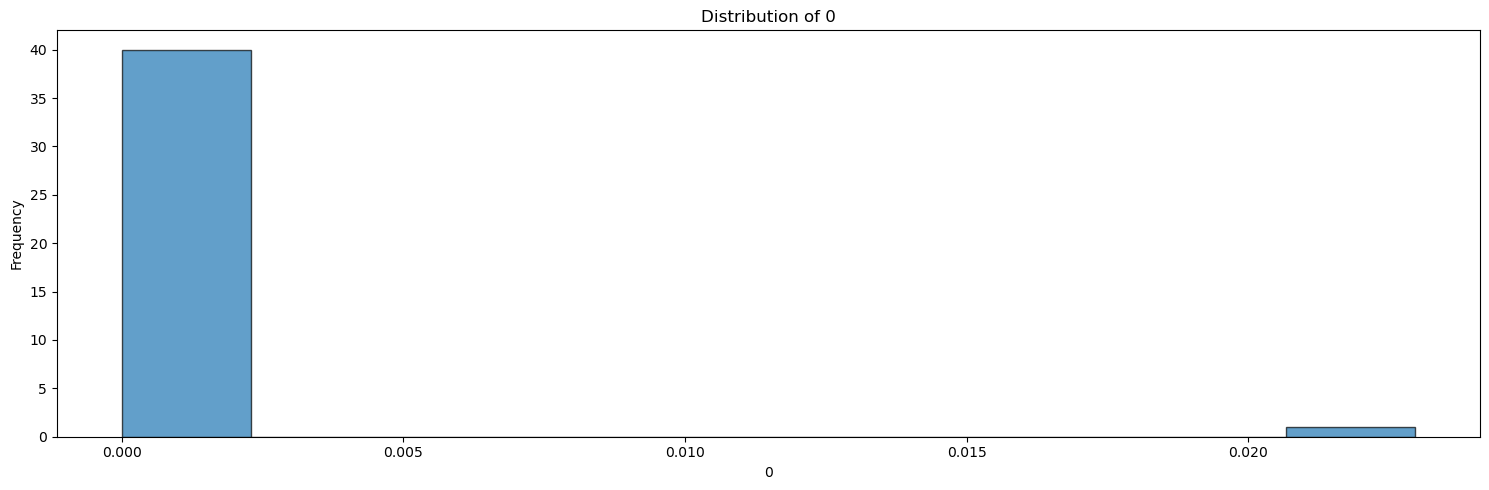

In [18]:
plot_distribution(pd.DataFrame(model.diffs[0]))

In [17]:
np.array(model.diffs)[0].shape

(41,)